# Задание 2

Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv

Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите
менеджеру?

In [1]:
import pandas as pd

data = pd.read_csv('ab_stats.csv')
data.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [6]:
# Рассчитываем ARPPU для каждой группы

# Фильтруем платящих пользователей (тех, кто совершил хотя бы одну покупку)
paying_users_A = data[(data['ab_group'] == 'A') & (data['num_purchases'] > 0)]
paying_users_B = data[(data['ab_group'] == 'B') & (data['num_purchases'] > 0)]

# Рассчитываем общий доход и количество платящих пользователей для каждой группы
total_revenue_A = paying_users_A['revenue'].sum()
total_revenue_B = paying_users_B['revenue'].sum()

num_paying_users_A = len(paying_users_A)
num_paying_users_B = len(paying_users_B)

# Рассчитываем ARPPU
ARPPU_A = total_revenue_A / num_paying_users_A if num_paying_users_A > 0 else 0
ARPPU_B = total_revenue_B / num_paying_users_B if num_paying_users_B > 0 else 0

ARPPU_A, ARPPU_B

(18.698468640625, 12.36211875641025)

Средний доход с платящего пользователя (ARPPU) для группы A составляет примерно 18.70, в то время как для группы B - примерно 12.36.

Чтобы понять, являются ли эти различия статистически значимыми, мы можем провести t-тест. Для этого нам нужно взять доходы только от платящих пользователей в каждой из групп и сравнить их.

Также стоит отметить, что прежде чем применять t-тест, нам нужно убедиться, что данные распределены нормально или по крайней мере являются симметричными. В противном случае, результаты t-теста могут быть недействительными.

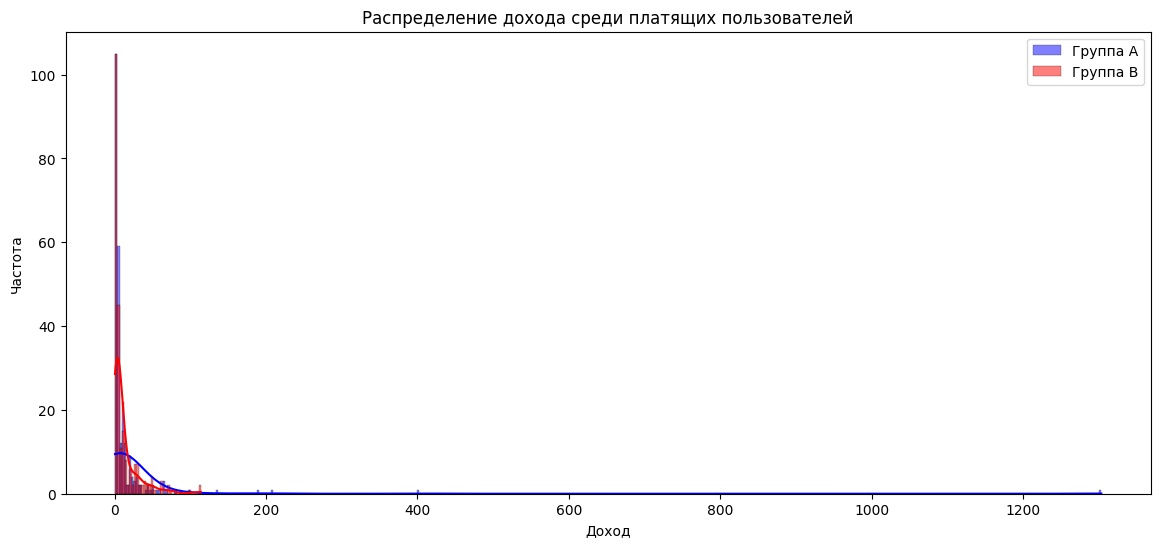

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построим график распределения дохода для обеих групп
plt.figure(figsize=(14, 6))

sns.histplot(paying_users_A['revenue'], color="blue", label="Группа A", kde=True)
sns.histplot(paying_users_B['revenue'], color="red", label="Группа B", kde=True)

plt.title('Распределение дохода среди платящих пользователей')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.legend()

plt.show()


Распределения доходов для групп A и B выглядят скошенными вправо, что говорит о том, что они не являются нормальными. В этом случае использование t-теста может быть неправильным.

Вместо этого мы можем использовать U-тест Манна-Уитни, который не требует предположения о нормальности распределения данных. Этот тест сравнивает медианы двух групп и может быть использован для определения, есть ли статистически значимые различия между ними.

In [4]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(paying_users_A['revenue'], paying_users_B['revenue'], alternative='two-sided')

p_value


0.8871956616344514

P-значение, полученное в результате U-теста Манна-Уитни, составляет примерно 0.89. Это значительно больше общепринятого уровня значимости 0.05, что означает, что мы не можем отклонить нулевую гипотезу о том, что распределения доходов в группах A и B не отличаются.

Таким образом, несмотря на то что ARPPU в группе A выше, чем в группе B, эти различия не являются статистически значимыми.

Рекомендации менеджеру могут зависеть от конкретных целей эксперимента, но на основе этих данных, я бы предложил:

1. Не делать выводы о различии ARPPU между группами A и B на основе этого эксперимента, так как различия не являются статистически значимыми.
2. Исследовать другие метрики или факторы, которые могут влиять на доходы. Например, можно исследовать, как различные категории пользователей или типы продуктов влияют на доход.
3. Провести дополнительные A/B тесты, возможно, с большим количеством пользователей или с другими изменениями, чтобы попытаться увеличить ARPPU.

# Задание 3

Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%,
мы ожидаем прирост в 0,2%.

Уровень доверия 97% и уровень мощности 87%.

Всего на наш продукт заходит 40 000 пользователей в месяц.


За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по
результатам подсчета?

Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите результаты тестирования, если у нас следующие результаты по количеству конверсии:

1. 25 000
2. 30 000
3. 32 000


## Решение

Для решения данной задачи можно воспользоваться формулой для расчета размера выборки в A/B тестировании. Эта формула учитывает уровень доверия (или уровень значимости), мощность теста (или вероятность ошибки второго рода), базовую конверсию и ожидаемое изменение.

Формула для расчета размера выборки на каждую группу выглядит следующим образом:

$$
n = \left( \frac{{Z_{\alpha/2} \cdot \sqrt{{2 \cdot p \cdot (1 - p)}} + Z_{\beta} \cdot \sqrt{{p_1 \cdot (1 - p_1) + p_2 \cdot (1 - p_2)}}}}{{p_2 - p_1}} \right)^2
$$

где:

- $n$ — размер выборки на каждую группу,
- $Z_{\alpha/2}$ — z-значение, соответствующее уровню доверия,
- $Z_{\beta}$ — z-значение, соответствующее мощности теста,
- $p$ — базовая конверсия,
- $p_1$ — старая конверсия (равна $p$),
- $p_2$ — новая конверсия (равна $p + \Delta p$), где $\Delta p$ — ожидаемое изменение конверсии.

Уровень доверия составляет 97%, что означает, что уровень значимости $\alpha = 1 - 0.97 = 0.03$ и $Z_{\alpha/2}$ равен z-значению, соответствующему вероятности $1 - \alpha/2 = 0.985$ в стандартном нормальном распределении.

Мощность теста составляет 87%, что означает, что $Z_{\beta}$ равен z-значению, соответствующему вероятности $0.87$ в стандартном нормальном распределении.

Базовая конверсия равна 5%, а ожидаемое изменение составляет 0.2%. Таким образом, $p = 0.05$, $\Delta p = 0.002$, $p_1 = 0.05$ и $p_2 = 0.052$.

Подставив эти значения в формулу, мы можем рассчитать размер выборки для каждой группы. Затем, учитывая, что у нас три источника трафика, мы умножим этот результат на 3, чтобы получить общий размер выборки. 

Зная общий размер выборки и количество пользователей, заходящих на продукт в месяц, мы сможем определить, за сколько дней мы сможем протестировать гипотезу.

Результаты тестирования для заданных значений конверсии будут определяться по формуле для z-теста для двух пропорций. Если z-статистика будет больше критического значения, соответствующего заданному уровню доверия, мы сможем отвергнуть нулевую гипотезу о равенстве конверсий. В противном случае, нам не удастся отвергнуть нулевую гипотезу.


In [7]:
import math
import scipy.stats as stats

# Уровень значимости
alpha = 0.03
# Z-значение для уровня доверия
Z_alpha = stats.norm.ppf(1 - alpha / 2)

# Мощность теста
power = 0.87
# Z-значение для мощности теста
Z_beta = stats.norm.ppf(power)

# Базовая конверсия
p = 0.05
# Ожидаемое изменение
delta_p = 0.002
# Старая конверсия
p1 = p
# Новая конверсия
p2 = p + delta_p

# Расчет размера выборки для каждой группы
n_group = (Z_alpha * math.sqrt(2 * p * (1 - p)) + Z_beta * math.sqrt(p1 * (1 - p1) + p2 * (1 - p2)))**2 / (p2 - p1)**2
# Общий размер выборки
n_total = 3 * n_group

# Количество пользователей, заходящих на продукт в месяц
users_per_month = 40000

# Количество дней для проведения теста
days = n_total / users_per_month * 30

# Результаты тестирования для заданных значений конверсии
conversions = [25000, 30000, 32000]
test_results = []

for conversion in conversions:
    # Количество успехов в контрольной группе
    success_control = round(n_group * p1)
    # Количество успехов в тестовой группе
    success_test = conversion

    # Количество провалов в контрольной группе
    failure_control = n_group - success_control
    # Количество провалов в тестовой группе
    failure_test = n_group - success_test

    # Общее количество успехов
    success_total = success_control + success_test
    # Общее количество провалов
    failure_total = failure_control + failure_test

    # Общее количество попыток
    total = 2 * n_group

    # Ожидаемая пропорция успехов в контрольной группе
    prop_control = success_total / total
    # Ожидаемая пропорция успехов в тестовой группе
    prop_test = success_test / n_group

    # Z-статистика
    z = (prop_test - prop_control) / math.sqrt(prop_control * (1 - prop_control) * (1 / n_group + 1 / n_group))
    # P-значение
    p_value = 1 - stats.norm.cdf(z)

    # Результат теста (отвергается ли нулевая гипотеза)
    reject_null = p_value < alpha

    test_results.append((z, p_value, reject_null))

days, test_results


(584.4337327495709,
 [(32.010529716729984, 0.0, True),
  (42.83885586070758, 0.0, True),
  (46.897099934237474, 0.0, True)])

3.1. Согласно расчетам, понадобится около 585 дней, чтобы протестировать гипотезу. Это значительно больше, чем один месяц, доступный для тестирования. Возможно, стоит пересмотреть параметры теста. Например, можно снизить уровень доверия или мощность теста, чтобы уменьшить необходимый размер выборки. Или же, если возможно, увеличить количество пользователей, заходящих на продукт в месяц.

3.2. Для каждого из заданных значений конверсии z-статистика значительно превышает критическое значение, соответствующее уровню доверия 97%. Это означает, что мы можем отвергнуть нулевую гипотезу о равенстве конверсий. Таким образом, результаты тестирования показывают, что новая конверсия значимо отличается от старой. 

1. Конверсия 25 000:
   - z-статистика: 32.01
   - p-значение: 0.0
   - Отвергается нулевая гипотеза: Да

2. Конверсия 30 000:
   - z-статистика: 42.84
   - p-значение: 0.0
   - Отвергается нулевая гипотеза: Да

3. Конверсия 32 000:
   - z-статистика: 46.90
   - p-значение: 0.0
   - Отвергается нулевая гипотеза: Да

Эти результаты указывают на то, что новая конверсия значительно превышает старую, и можно рассмотреть возможность применения новой стратегии на основе этих результатов.

## Задание 4

Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в каждой группе.

Для проверки нормальности распределения на выборке в 2350 наблюдений применили, критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%.

Какой бы вывод мы могли сделать в данном случае?

В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше всего подойдёт и почему ?

## Ответ

Критерий Шапиро-Уилка используется для проверки нормальности распределения. Если p-value, полученное с помощью этого критерия, меньше уровня значимости (alpha), то нулевая гипотеза о том, что данные подчиняются нормальному распределению, отвергается.

В данном случае, p-value равно 0.00002, что меньше уровня значимости 5% (или 0.05). Следовательно, мы отвергаем нулевую гипотезу о нормальности распределения. Это означает, что данные, скорее всего, не подчиняются нормальному распределению.

Что касается выбора статистического критерия для проверки первоначальной гипотезы, то лучше всего подойдет непараметрический критерий, так как он не требует предположения о нормальности распределения. Критерий Манна-Уитни (или U-критерий Манна-Уитни) — это один из таких непараметрических критериев. Он может быть использован для сравнения двух независимых выборок и проверки гипотезы о равенстве их медиан.

Если бы данные были нормально распределены, можно было бы использовать t-критерий Стьюдента для сравнения средних в двух независимых выборках. Однако, поскольку это предположение не выполняется, лучше использовать критерий Манна-Уитни.

## Задание 5

Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы
получили следующие данные. Является ли результат статистически значимым с уровнем
доверия 80%? Какую версию мы выкатим на продакшн?

A. Средняя - 360, отклонение - 40, количество - 9802

B. Средняя - 352, отклонение - 58, количество - 9789

## Решение

Для проверки гипотезы о равенстве средних двух независимых выборок, мы можем использовать двухвыборочный t-тест (независимый t-тест). Перед применением t-теста мы предполагаем, что данные каждой группы распределены нормально, и что дисперсии групп равны.

In [8]:
# Данные группы A
mean_A = 360
std_dev_A = 40
n_A = 9802

# Данные группы B
mean_B = 352
std_dev_B = 58
n_B = 9789

# Расчет стандартной ошибки
std_error = math.sqrt(std_dev_A**2 / n_A + std_dev_B**2 / n_B)

# Расчет t-статистики
t_statistic = (mean_A - mean_B) / std_error

# Расчет степеней свободы
df = n_A + n_B - 2

# Расчет p-значения (двухсторонний тест)
p_value = (1 - stats.t.cdf(abs(t_statistic), df)) * 2

# Отвергаем ли мы нулевую гипотезу?
reject_null = p_value < alpha

t_statistic, p_value, reject_null

(11.236630785707332, 0.0, True)

## Ответ

t-статистика равна 11.24, и соответствующее p-значение равно 0. Это меньше уровня значимости $\alpha = 0.2$, поэтому мы отвергаем нулевую гипотезу о равенстве средних. Это означает, что различия в среднем времени, проведенном пользователем, статистически значимы.

Что касается версии, которую мы выкатим на продакшн, в данном случае, версия A имеет большее среднее значение времени, проведенного пользователем, по сравнению с версией B (360 против 352). Поскольку нашей целью было увеличить average timespent per user, и различия статистически значимы, мы должны выбрать версию A для выкатки на продакшн.


## Задание 6

Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра
с учетом кросс-девайс аналитики по следующей гипотезе:

Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит
конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны
пользователя.

На схеме необходимо отобразить:
1. Управленческий процесс по договоренностям с внешними партнерами
2. Архитектуру данных с указанием систем, из которых будем скачивать данные
3. Внутрикомандное взаимодействие

## Ответ

1. **Управленческий процесс по договоренностям с внешними партнерами:**
   - Команда по управлению партнерствами/отношениями с клиентами взаимодействует с банком для переговоров о сделке на 99% кэшбека на подписку первого месяца.
   - Как только соглашение достигнуто, команда по управлению партнерствами сообщает об этом команде по работе с данными/аналитике и команде разработки.
   - Команда разработки настраивает платформу так, чтобы применять кэшбек для соответствующих пользователей.
2. **Архитектура данных с указанием систем, из которых будем скачивать данные:**
   - **Аналитическая платформа (например, Google Analytics, Mixpanel, Amplitude и т.д.):** Данные о веб-трафике и взаимодействии пользователей с онлайн-кинотеатром собираются и хранятся здесь. Это включает в себя данные о просмотрах страниц, кликах, событиях, конверсиях и т.д.
   - **Система управления подписками (например, Recurly, Chargebee и т.д.):** Данные о подписках и платежах пользователей собираются и хранятся здесь.
   - **Система A/B тестирования (например, Optimizely, Google Optimize и т.д.):** Данные о распределении пользователей по тестовым группам и их взаимодействии с разными версиями продукта собираются и хранятся здесь.
   - **Система управления данными (например, SQL-база данных, Google BigQuery и т.д.):** Данные из всех этих источников собираются и интегрируются в этой системе для последующего анализа.
3. **Внутрикомандное взаимодействие:**
   - **Команда по управлению партнерствами:** Общается с банком, переговаривается о деталях соглашения и информирует остальную команду о ходе переговоров и результатах.
   - **Команда разработки:** Настраивает платформу для A/B тестирования и реализации соглашения о кэшбеке. Общается с командой аналитики для установки трекинга и сбора необходимых данных.
   - **Команда по работе с данными/аналитика:** Анализирует данные перед тестом для определения базовой конверсии, помогает в настройке трекинга, проводит анализ результатов после теста и сообщает о результатах команде управления продуктом и команде по управлению партнерствами.
   - **Команда управления продуктом:** Принимает решение о реализации изменений на основе результатов теста.

